## <font color=red> Problem Statement

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. 

## <font color=red> Importing necessary libraries

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
pd.set_option('display.max_columns', None)

## <font color=red> Loading and Understanding Data

In [4]:
# load dataset
leads = pd.read_csv('Leads.csv')

In [5]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [6]:
leads.shape

(9240, 37)

In [7]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [8]:
# statistical information for numerical columns
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


> **Insights:**
- Data set has 9240 rows and 37 columns
- Data type of the columns is fine: 7 numeric and 30 object type

## <font color=red> Data inspection

### <font color=blue> Removing of unwanted columns

In [9]:
# check percentage value_counts of categorical variables

# create a var cat_cols containing the names of Object type var
cat_cols = leads.select_dtypes(include='object').columns
cat_cols = cat_cols.drop('Prospect ID')

# generating for loop to print the value count percentages of required var
for i in cat_cols:
    print(leads[i].value_counts(normalize=True, dropna=False)*100)
    print('='*70)
    
print(leads['Converted'].value_counts(normalize=True, dropna=False)*100)

Landing Page Submission    52.878788
API                        38.744589
Lead Add Form               7.770563
Lead Import                 0.595238
Quick Add Form              0.010823
Name: Lead Origin, dtype: float64
Google               31.038961
Direct Traffic       27.521645
Olark Chat           18.993506
Organic Search       12.489177
Reference             5.779221
Welingak Website      1.536797
Referral Sites        1.352814
Facebook              0.595238
NaN                   0.389610
bing                  0.064935
google                0.054113
Click2call            0.043290
Press_Release         0.021645
Social Media          0.021645
Live Chat             0.021645
youtubechannel        0.010823
testone               0.010823
Pay per Click Ads     0.010823
welearnblog_Home      0.010823
WeLearn               0.010823
blog                  0.010823
NC_EDM                0.010823
Name: Lead Source, dtype: float64
No     92.056277
Yes     7.943723
Name: Do Not Email, dtype: floa

> **Insights:**

**1. Dropping Sales generated columns because those are the data entries that are made after the sales team has connected with the student. Those data have no bearing to the purpose of our model ie. providing lead score. The columns are:**
- `Tags`
- `Last Activity`
- `Last Notable Activity`
- `Lead Profile`
- `Lead Quality`
- `Asymmetrique Activity Index`             
- `Asymmetrique Profile Index`               
- `Asymmetrique Activity Score`            
- `Asymmetrique Profile Score`   

**2. There are columns that can be removed as they have one type of value more than 99%**
- `Do Not Call`
- `Search`
- `Magazine`
- `Newspaper Article`
- `X Education Forums`
- `Newspaper`
- `Digital Advertisement`
- `Through Recommendations`
- `Receive More Updates About Our Courses`
- `Update me on Supply Chain Content`
- `Get updates on DM Content`
- `I agree to pay the amount through cheque`
- `What matters most to you in choosing a course`

**3. We will use Lead Number as Unique identification number, so removing `Prospect ID`**

In [10]:
# dropping the unwanted columns
leads.drop(columns=['Tags','Last Activity','Last Notable Activity','Lead Profile','Lead Quality','Asymmetrique Profile Score',
                    'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
                    'Prospect ID','Do Not Call', 'Search', 'Magazine','Newspaper Article', 'X Education Forums', 'Newspaper',
                    'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses',
                    'Update me on Supply Chain Content', 'Get updates on DM Content', 
                    'I agree to pay the amount through cheque','What matters most to you in choosing a course'], inplace=True)

In [11]:
leads.shape

(9240, 14)

### <font color=blue> Null Values Treatment

In [12]:
# null value percentage
leads.isnull().sum()*100/len(leads)

Lead Number                                0.000000
Lead Origin                                0.000000
Lead Source                                0.389610
Do Not Email                               0.000000
Converted                                  0.000000
TotalVisits                                1.482684
Total Time Spent on Website                0.000000
Page Views Per Visit                       1.482684
Country                                   26.634199
Specialization                            15.562771
How did you hear about X Education        23.885281
What is your current occupation           29.112554
City                                      15.367965
A free copy of Mastering The Interview     0.000000
dtype: float64

> **Insights:**
- A few variables have "Select" value
- Will replace it with Null and check Null value percentages again

In [13]:
# replace 'Select' with 'NaN'
leads.replace('Select',np.NaN,inplace=True)

In [14]:
# check Null value percentage again
leads.isnull().sum()*100/len(leads)

Lead Number                                0.000000
Lead Origin                                0.000000
Lead Source                                0.389610
Do Not Email                               0.000000
Converted                                  0.000000
TotalVisits                                1.482684
Total Time Spent on Website                0.000000
Page Views Per Visit                       1.482684
Country                                   26.634199
Specialization                            36.580087
How did you hear about X Education        78.463203
What is your current occupation           29.112554
City                                      39.707792
A free copy of Mastering The Interview     0.000000
dtype: float64

> **Insights:**

1. Remove columns with high percentage NULL values: `How did you hear about X Education`

2. Replace NULL value with 'Mode' for the categorical column: `Lead Source`

3. Replace NULL value with 'Median' for the continuous column: `TotalVisits`, `Page Views Per Visit`

4. Replace NULL value with 'Other': `What is your current occupation` ('Other' category already present)

5. Replace NULL value with 'unknown':`Country`, `Specialization`, `City`

In [15]:
# drop columns
leads.drop(columns=['How did you hear about X Education'], inplace=True)

# replace NULL values with 'unknown'
for i in ['Country', 'Specialization', 'City']:
    leads[i].fillna('unknown', inplace=True)

# replace NULL values with 'Other'
leads['What is your current occupation'].fillna('Other', inplace=True)

# replace NULL values with 'Median'
for i in ['TotalVisits', 'Page Views Per Visit']:
    median = leads[i].median()
    leads[i].fillna(median, inplace=True)
    
# replace NULL values with 'Mode'
mode = leads['Lead Source'].mode()[0]
leads['Lead Source'].fillna(mode, inplace=True)

In [16]:
# checking NULL values again
leads.isnull().sum()

Lead Number                               0
Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Country                                   0
Specialization                            0
What is your current occupation           0
City                                      0
A free copy of Mastering The Interview    0
dtype: int64

### <font color=blue> Outliers Treatment

In [17]:
# creating a var to contain all continuous columns

cont_cols = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']
cont_cols

['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

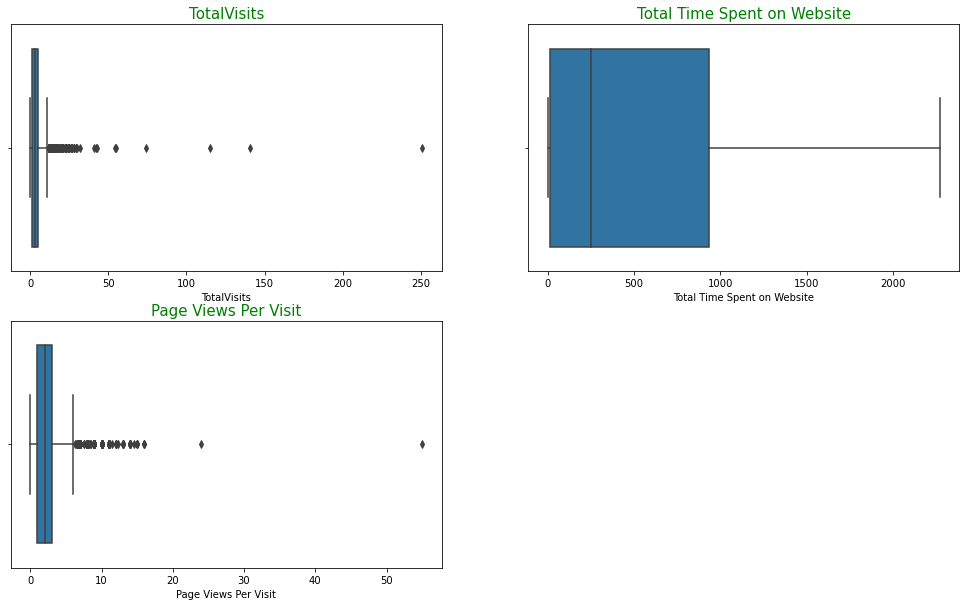

In [18]:
# plot boxplot for continuous variables to check for outliers

plt.figure(figsize=(17,10))

for i,v in enumerate(cont_cols):
    plt.subplot(2,2,(i+1))
    sns.boxplot(leads[v])
    plt.title(f'{v}',fontdict={'fontsize':15, 'fontweight':5, 'color':'g'})

> **Insights:**
- Outliers present in `TotalVisits` and `Page Views Per Visit` but we cannot remove them as they are of siginificance

### <font color=blue>Binning different categories in one category for categorical columns

### `Country`

In [19]:
# checking percentage value counts
leads.Country.value_counts(normalize=True)*100

India                   70.259740
unknown                 26.688312
United States            0.746753
United Arab Emirates     0.573593
Singapore                0.259740
Saudi Arabia             0.227273
United Kingdom           0.162338
Australia                0.140693
Qatar                    0.108225
Bahrain                  0.075758
Hong Kong                0.075758
Oman                     0.064935
France                   0.064935
Kuwait                   0.043290
South Africa             0.043290
Canada                   0.043290
Nigeria                  0.043290
Germany                  0.043290
Sweden                   0.032468
Philippines              0.021645
Asia/Pacific Region      0.021645
Italy                    0.021645
Uganda                   0.021645
Bangladesh               0.021645
Netherlands              0.021645
China                    0.021645
Belgium                  0.021645
Ghana                    0.021645
Kenya                    0.010823
Sri Lanka     

> **Insights:**
- For `Country` column, 'India' and 'unknown' are more than 96%
- We will create a new category 'Others' and dump all values in them

In [20]:
# dumping all countries names except 'India' and 'unknown' in 'Others'
countries = leads.Country.value_counts().index
countries = countries.drop(['India','unknown'])
leads.Country.replace(countries, 'Others', inplace=True)

In [21]:
# checking percentage value counts again
leads.Country.value_counts() 

India      6492
unknown    2466
Others      282
Name: Country, dtype: int64

### `City`

In [22]:
# checking percentage value counts
leads.City.value_counts(normalize=True)*100

unknown                        39.707792
Mumbai                         34.870130
Thane & Outskirts               8.138528
Other Cities                    7.424242
Other Cities of Maharashtra     4.945887
Other Metro Cities              4.112554
Tier II Cities                  0.800866
Name: City, dtype: float64

> **Insights:**
- For `City` column, 'Mumbai' and 'unknown' categories constitute more than 75% values
- We will create a new category 'Others' and dump all values in them

In [23]:
# dumping all countries names except 'India' and 'unknown' in 'Others'
cities = leads.City.value_counts().index
cities = cities.drop(['Mumbai','unknown'])
leads.City.replace(cities, 'Others', inplace=True)

In [24]:
# checking percentage value counts again
leads.City.value_counts(normalize=True)*100

unknown    39.707792
Mumbai     34.870130
Others     25.422078
Name: City, dtype: float64

## <font color=red> Data Visualisation

In [25]:
# variable containing continuous columns
cont_cols = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

In [26]:
# variable containing categorical columns
cat_cols = leads.select_dtypes(include='object').columns
cat_cols

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Country',
       'Specialization', 'What is your current occupation', 'City',
       'A free copy of Mastering The Interview'],
      dtype='object')

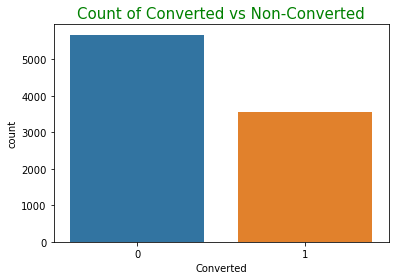

Percentage of Converted vs Non-Converted Leads:
0    61.46
1    38.54
Name: Converted, dtype: float64


In [27]:
# barplot of Target variable
sns.countplot(leads.Converted)

plt.title('Count of Converted vs Non-Converted',fontdict={'fontsize':15, 'fontweight':5, 'color':'g'} )
plt.show()

print('Percentage of Converted vs Non-Converted Leads:')
print(round(leads.Converted.value_counts(normalize=True)*100,2))

> **Insights:**
- Number of converted leads (38.54%) is significantly lower than non-converted (61%)

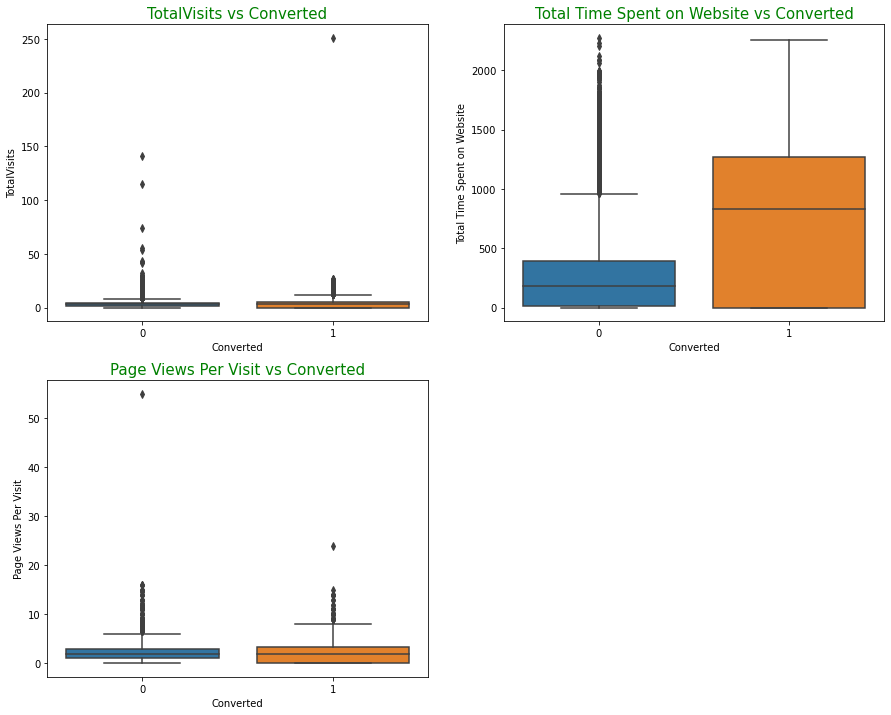

In [28]:
# boxplot of continuous variables vs Target variable

plt.figure(figsize=(15,12))

for i,v in enumerate(cont_cols):
    plt.subplot(2,2,i+1)
    sns.boxplot(x=leads.Converted, y=leads[v])
    plt.title(f'{v} vs Converted',fontdict={'fontsize':15, 'fontweight':5, 'color':'g'})

> **Insights:**
- For `Total Time Spent on Website` converted leads is more than that compared to non-converted

In [29]:
# defining a function to plot counplots of various categorical variables with Target variable

def countplot_func(list_of_vars=[], n_rows=1, n_cols=1, rot=20):
    for i,v in enumerate(list_of_vars):
        n = len(list_of_vars)
        plt.subplot(n_rows,n_cols,i+1)
        ax = sns.countplot(x=leads[v], hue=leads.Converted)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=rot)
        plt.legend(loc='upper right')
        plt.title(f'Countplot of {v}',fontdict={'fontsize':15, 'fontweight':5, 'color':'g'})

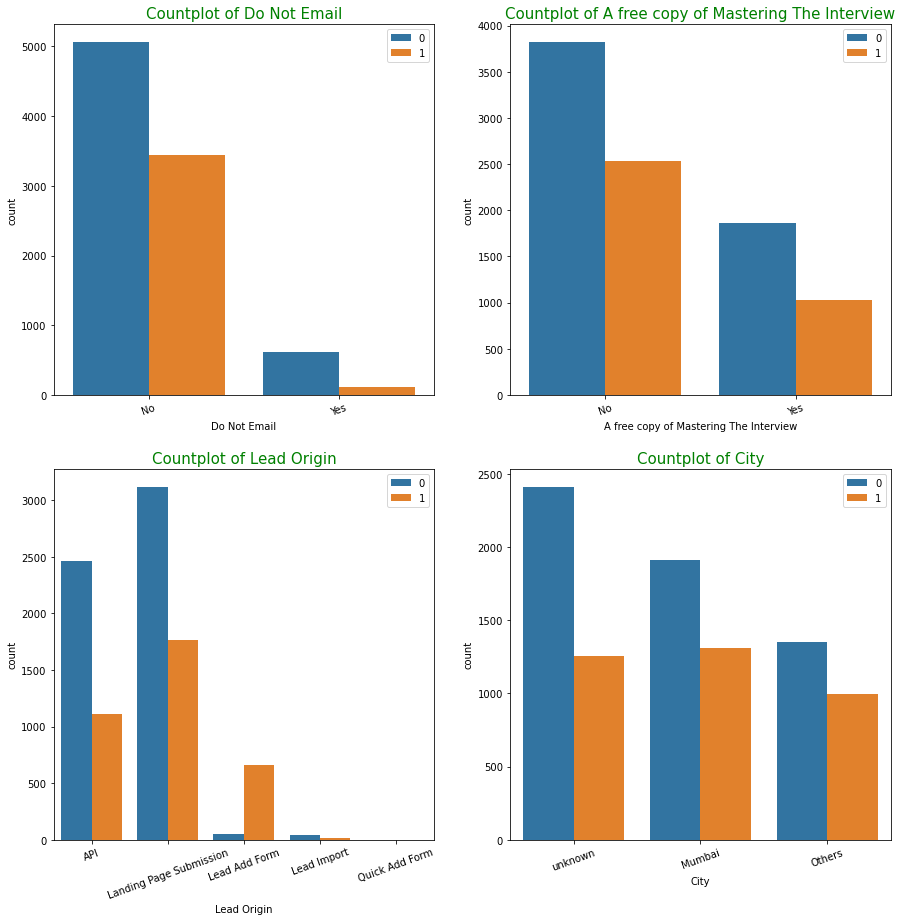

In [30]:
# countplots of categorical variables
plt.figure(figsize=(15,15))
countplot_func(['Do Not Email','A free copy of Mastering The Interview',
                'Lead Origin', 'City'],2,2)

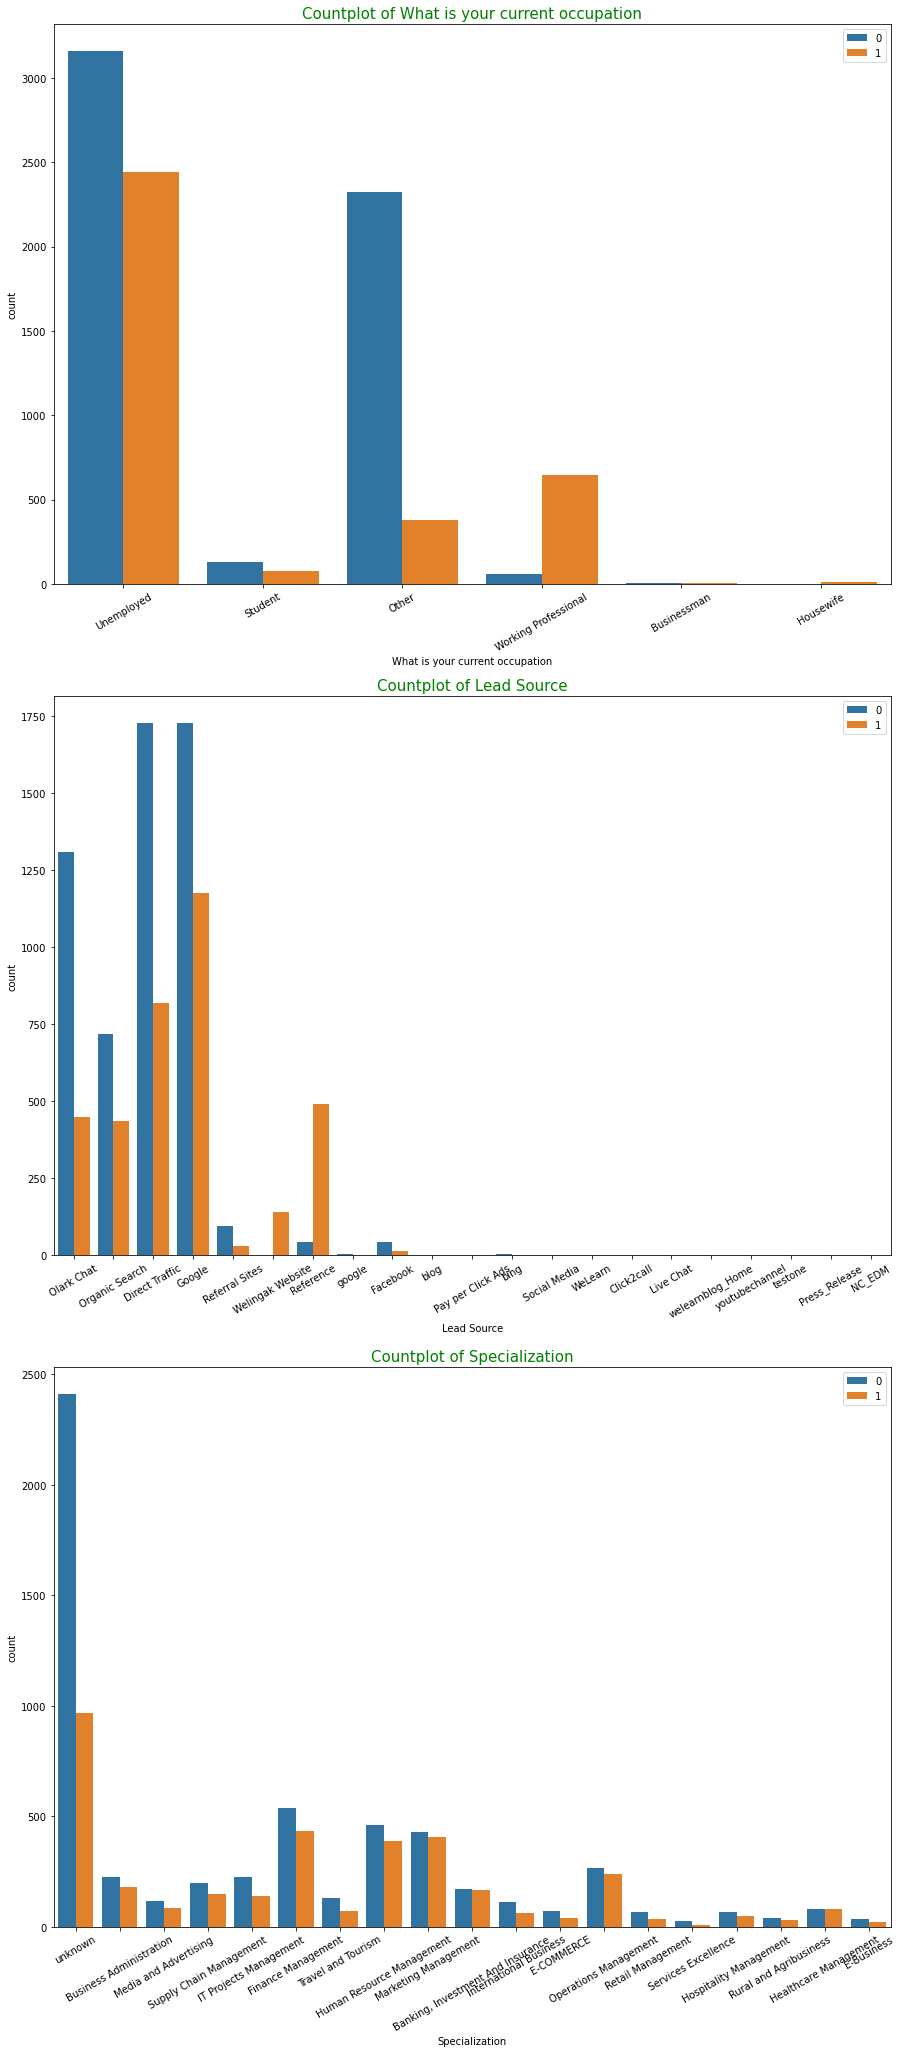

In [31]:
# countplots of categorical variables
plt.figure(figsize=(15,35))
countplot_func(['What is your current occupation','Lead Source','Specialization'],3,1,30)

> **Insights:**
- Most cases non-converted is more than converted leads which is to be expected since total percent of non-converted is more
- For `Lead Origin`:'Lead Add Form' converted leads is significantly higher
- For `Lead Source`: 'Welingak Website' and 'Reference' has higher number of Converted
- For `What is Your Current Occupation`: 'Working Professionals' have a higher number a Converted

#### Multivariate Analysis

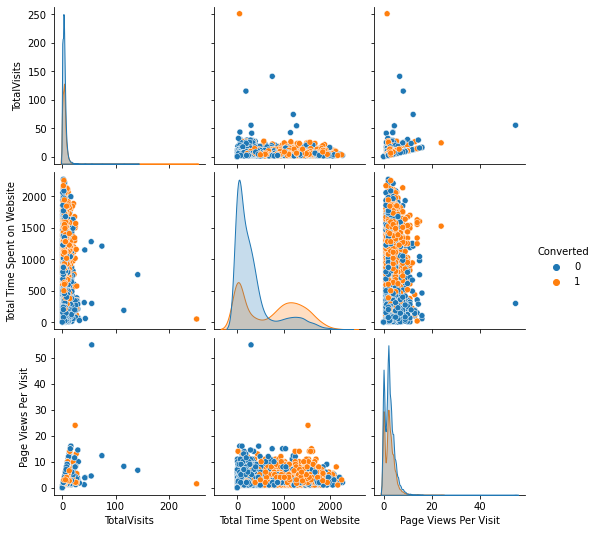

In [32]:
# pairplot of continuous variables
sns.pairplot(data=leads,x_vars=cont_cols, y_vars=cont_cols, hue='Converted')
plt.show()

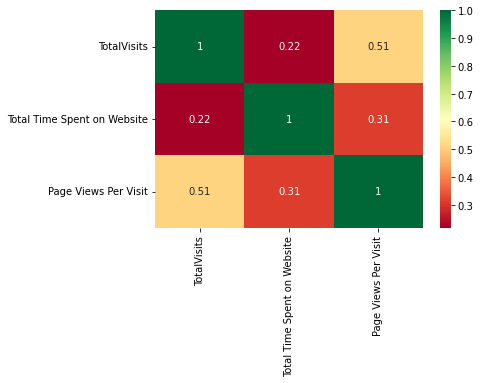

In [33]:
# heatmap showing correlations between continuous variables
sns.heatmap(data=leads[cont_cols].corr(), annot=True, cmap='RdYlGn')
plt.show()

> **Insights:**
- `TotalVisits` and `Page Views Per Visit` have correlation on the higher side

## <font color=red> Data Preparation

### <font color=blue> Converting Binary variables to 0/1

In [34]:
# converting binary variables to 0/1
leads[['Do Not Email','A free copy of Mastering The Interview']] = leads[['Do Not Email','A free copy of Mastering The Interview']].apply(lambda x:x.map({'Yes':1,'No':0}))

### <font color=blue> Creating dummy variables

In [35]:
# creating a variable containing columns for dummification
dummy_cols = leads.select_dtypes(include='object').columns
dummy_cols

Index(['Lead Origin', 'Lead Source', 'Country', 'Specialization',
       'What is your current occupation', 'City'],
      dtype='object')

In [36]:
# dummification
leads = pd.get_dummies(data=leads, columns=dummy_cols, drop_first=True, prefix=None)
leads.head()

,Lead Number,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Country_Others,Country_unknown,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_unknown,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Others,City_unknown
0,660737,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1
1,660728,0,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1
2,660727,0,1,2.0,1532,2.0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,660719,0,0,1.0,305,1.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,660681,0,1,2.0,1428,1.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0


In [37]:
leads.shape

(9240, 58)

### <font color=blue> Splitting into X and y

In [38]:
# X variables
X = leads.drop(columns=['Lead Number','Converted'])
X.shape

(9240, 56)

In [39]:
# y variable
y = leads['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

### <font color=blue> train_test_split

In [40]:
# import library
from sklearn.model_selection import train_test_split

# splitting in ratio train:test = 70:30
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### <font color=blue>Scaling

In [41]:
# import library
from sklearn.preprocessing import StandardScaler

In [42]:
# create object
scaler = StandardScaler()

# fit_transform
X_train[cont_cols] = scaler.fit_transform(X_train[cont_cols])

In [43]:
X_train[cont_cols].head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
1871,-0.656434,-0.885371,-1.085519
6795,0.100767,0.005716,-0.470569
3516,0.290067,-0.691418,0.070401
8105,0.290067,1.365219,1.226321
3934,-0.656434,-0.885371,-1.085519


<AxesSubplot:>

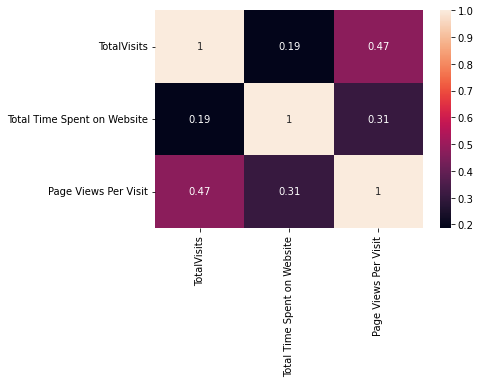

In [44]:
# heatmap of correlations of continuous variables
sns.heatmap(X_train[cont_cols].corr(), annot=True)

## <font color=red>Building Model

In [45]:
# import library
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [46]:
# define model building func using statsmodel
def build_model(X,y):
    logm = sm.GLM(y, sm.add_constant(X), family= sm.families.Binomial())
    return logm.fit()

# define func which calculates VIF
def check_vif(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    vif = vif.sort_values(by='VIF', ascending=False)
    return(vif)

In [47]:
# building model using all variables
res = build_model(X_train, y_train)
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6412
Model Family:                Binomial   Df Model:                           55
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2821.2
Date:                Tue, 12 Jul 2022   Deviance:                       5642.3
Time:                        21:49:02   Pearson chi2:                 7.68e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.5623      1.716     -1.494      0.135      -5.925       0.800
Do Not Email                                            -1.3075      0.165     -7.935      0.000      -1.631      -0.985
TotalVisits                                              0.1270      0.043      2.980      0.003       0.043       0.211
Total Time Spent on Website                              1.0967      0.039     28.012      0.000       1.020       1.173
Page Views Per Visit                                    -0.0444      0.048     -0.925      0.355      -0.139       0.050
A free copy of Mastering The Interview                  -0.1999      0.105     -1.908      0.056      -0.405       0.005
Lead Origin_Landing Page Submission                     -0.9353      0.148     -6.316      0.000      -1.226      -0.645
Lead Origin_Lead Add Form                                2.2641      0.555      4.076      0.000       1.175       3.353
Lead Origin_Lead Import                                 -1.3516      2.483     -0.544      0.586      -6.218       3.515
Lead Origin_Quick Add Form                              19.6949   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Direct Traffic                               2.0973      1.404      1.494      0.135      -0.653       4.848
Lead Source_Facebook                                     1.8259      2.838      0.643      0.520      -3.736       7.388
Lead Source_Google                                       2.3432      1.397      1.677      0.094      -0.395       5.082
Lead Source_Live Chat                                   24.5857   5.62e+04      0.000      1.000    -1.1e+05     1.1e+05
Lead Source_NC_EDM                                      26.7715   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Olark Chat                                   2.3587      1.412      1.671      0.095      -0.408       5.126
Lead Source_Organic Search                               2.2921      1.405      1.631      0.103      -0.462       5.046
Lead Source_Pay per Click Ads                          -19.9336   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Press_Release                              -19.1935   5.52e+04     -0.000      1.000   -1.08e+05    1.08e+05
Lead Source_Reference                                    2.2540      1.315      1.714      0.087      -0.324       4.832
Lead Source_Referral Sites                               1.8523      1.433      1.292      0.196      -0.957       4.662
Lead Source_Social Media                                 2.6603      2.144      1.241      0.215      -1.542       6.863
Lead Source_WeLearn                                     25

### <font color=blue>Feature Selection using RFE

In [48]:
# building model using sklearn

logreg = LogisticRegression()  # create object
rfe = RFE(logreg, 20) # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)  # fit model

In [49]:
# list of all variables with their rankings
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 21),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 28),
 ('A free copy of Mastering The Interview', False, 11),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Origin_Quick Add Form', False, 34),
 ('Lead Source_Direct Traffic', False, 4),
 ('Lead Source_Facebook', True, 1),
 ('Lead Source_Google', False, 35),
 ('Lead Source_Live Chat', True, 1),
 ('Lead Source_NC_EDM', True, 1),
 ('Lead Source_Olark Chat', False, 36),
 ('Lead Source_Organic Search', False, 29),
 ('Lead Source_Pay per Click Ads', False, 10),
 ('Lead Source_Press_Release', False, 9),
 ('Lead Source_Reference', False, 26),
 ('Lead Source_Referral Sites', True, 1),
 ('Lead Source_Social Media', False, 22),
 ('Lead Source_WeLearn', False, 8),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 6),
 ('Lead Source_blog', False, 18),
 (

In [50]:
# columns selected by RFE
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Facebook',
       'Lead Source_Live Chat', 'Lead Source_NC_EDM',
       'Lead Source_Referral Sites', 'Lead Source_Welingak Website',
       'Country_unknown', 'Specialization_Hospitality Management',
       'Specialization_International Business',
       'Specialization_Retail Management',
       'Specialization_Rural and Agribusiness', 'Specialization_unknown',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Working Professional', 'City_unknown'],
      dtype='object')

### <font color=blue> Building model using statsmodel for detailed statistics

<font color=brown>**MODEL 1**

In [51]:
# building 1st model

res = build_model(X_train[col], y_train)
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2843.3
Date:                Tue, 12 Jul 2022   Deviance:                       5686.6
Time:                        21:49:06   Pearson chi2:                 7.67e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.3244      0.127      2.545      0.011       0.075       0.574
Do Not Email                                            -1.2896      0.160     -8.051      0.000      -1.604      -0.976
Total Time Spent on Website                              1.0945      0.039     28.303      0.000       1.019       1.170
Lead Origin_Landing Page Submission                     -1.0951      0.131     -8.334      0.000      -1.353      -0.838
Lead Origin_Lead Add Form                                2.1435      0.199     10.759      0.000       1.753       2.534
Lead Origin_Lead Import                                 -1.3397      2.439     -0.549      0.583      -6.121       3.441
Lead Source_Facebook                                    -0.4983      2.440     -0.204      0.838      -5.280       4.284
Lead Source_Live Chat                                   21.3480   3.41e+04      0.001      1.000   -6.68e+04    6.68e+04
Lead Source_NC_EDM                                      23.6119   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Lead Source_Referral Sites                              -0.4070      0.308     -1.320      0.187      -1.011       0.197
Lead Source_Welingak Website                             2.5640      0.743      3.450      0.001       1.107       4.021
Country_unknown                                          0.9732      0.115      8.451      0.000       0.748       1.199
Specialization_Hospitality Management                   -1.0043      0.322     -3.122      0.002      -1.635      -0.374
Specialization_International Business                   -0.4316      0.253     -1.704      0.088      -0.928       0.065
Specialization_Retail Management                        -0.4146      0.322     -1.289      0.198      -1.045       0.216
Specialization_Rural and Agribusiness                    0.4050      0.377      1.074      0.283      -0.334       1.144
Specialization_unknown                                  -0.8043      0.153     -5.245      0.000      -1.105      -0.504
What is your current occupation_Housewife               22.2729   1.34e+04      0.002      0.999   -2.62e+04    2.62e+04
What is your current occupation_Other                   -1.1706      0.083    -14.084      0.000      -1.334      -1.008
What is your current occupation_Working Professional     2.4184      0.184     13.170      0.000       2.058       2.778
City_unknown                                            -0.4498      0.164     -2.737      0.006      -0.772      -0.128
========================================================================================================================
"""

> **Insights:**
- Will drop `Lead Source_Live Chat` cause of high p-value

In [52]:
# dropping specified column
col = col.drop('Lead Source_Live Chat')

<font color=brown>**MODEL 2**

In [53]:
# building 2nd model

res = build_model(X_train[col], y_train)
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6448
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2843.8
Date:                Tue, 12 Jul 2022   Deviance:                       5687.6
Time:                        21:49:06   Pearson chi2:                 7.69e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.3223      0.127      2.529      0.011       0.073       0.572
Do Not Email                                            -1.2911      0.160     -8.058      0.000      -1.605      -0.977
Total Time Spent on Website                              1.0945      0.039     28.300      0.000       1.019       1.170
Lead Origin_Landing Page Submission                     -1.0930      0.131     -8.318      0.000      -1.350      -0.835
Lead Origin_Lead Add Form                                2.1589      0.199     10.853      0.000       1.769       2.549
Lead Origin_Lead Import                                 -1.3383      2.437     -0.549      0.583      -6.116       3.439
Lead Source_Facebook                                    -0.4986      2.438     -0.205      0.838      -5.277       4.280
Lead Source_NC_EDM                                      23.6120   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Lead Source_Referral Sites                              -0.4072      0.308     -1.321      0.186      -1.011       0.197
Lead Source_Welingak Website                             2.5487      0.743      3.430      0.001       1.092       4.005
Country_unknown                                          0.9728      0.115      8.448      0.000       0.747       1.198
Specialization_Hospitality Management                   -1.0052      0.322     -3.123      0.002      -1.636      -0.374
Specialization_International Business                   -0.4315      0.253     -1.704      0.088      -0.928       0.065
Specialization_Retail Management                        -0.4145      0.322     -1.288      0.198      -1.045       0.216
Specialization_Rural and Agribusiness                    0.4051      0.377      1.075      0.283      -0.334       1.144
Specialization_unknown                                  -0.8021      0.153     -5.230      0.000      -1.103      -0.502
What is your current occupation_Housewife               22.2710   1.34e+04      0.002      0.999   -2.61e+04    2.62e+04
What is your current occupation_Other                   -1.1708      0.083    -14.086      0.000      -1.334      -1.008
What is your current occupation_Working Professional     2.4180      0.184     13.167      0.000       2.058       2.778
City_unknown                                            -0.4490      0.164     -2.731      0.006      -0.771      -0.127
========================================================================================================================
"""

> **Insights:**
- Will drop `Lead Source_NC_EDM` cause of high p-value

In [54]:
# dropping specified column
col = col.drop('Lead Source_NC_EDM')

<font color=brown>**MODEL 3**

In [55]:
# building 3rd model

res = build_model(X_train[col], y_train)
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6449
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2845.2
Date:                Tue, 12 Jul 2022   Deviance:                       5690.3
Time:                        21:49:06   Pearson chi2:                 7.69e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.3221      0.127      2.527      0.011       0.072       0.572
Do Not Email                                            -1.2922      0.160     -8.065      0.000      -1.606      -0.978
Total Time Spent on Website                              1.0947      0.039     28.310      0.000       1.019       1.171
Lead Origin_Landing Page Submission                     -1.0919      0.131     -8.311      0.000      -1.349      -0.834
Lead Origin_Lead Add Form                                2.1602      0.199     10.859      0.000       1.770       2.550
Lead Origin_Lead Import                                 -1.3374      2.438     -0.549      0.583      -6.116       3.441
Lead Source_Facebook                                    -0.4992      2.439     -0.205      0.838      -5.279       4.280
Lead Source_Referral Sites                              -0.4076      0.308     -1.322      0.186      -1.012       0.197
Lead Source_Welingak Website                             2.5491      0.743      3.430      0.001       1.093       4.006
Country_unknown                                          0.9728      0.115      8.448      0.000       0.747       1.198
Specialization_Hospitality Management                   -1.0066      0.322     -3.128      0.002      -1.637      -0.376
Specialization_International Business                   -0.4328      0.253     -1.709      0.087      -0.929       0.064
Specialization_Retail Management                        -0.4158      0.322     -1.292      0.196      -1.046       0.215
Specialization_Rural and Agribusiness                    0.4042      0.377      1.072      0.284      -0.335       1.143
Specialization_unknown                                  -0.8028      0.153     -5.235      0.000      -1.103      -0.502
What is your current occupation_Housewife               22.2702   1.34e+04      0.002      0.999   -2.61e+04    2.62e+04
What is your current occupation_Other                   -1.1667      0.083    -14.054      0.000      -1.329      -1.004
What is your current occupation_Working Professional     2.4177      0.184     13.165      0.000       2.058       2.778
City_unknown                                            -0.4493      0.164     -2.733      0.006      -0.772      -0.127
========================================================================================================================
"""

> **Insights:**
- Will drop `What is your current occupation_Housewife` cause of high p-value

In [56]:
# dropping specified column
col = col.drop('What is your current occupation_Housewife')

<font color=brown>**MODEL 4**

In [57]:
# building 4th model

res = build_model(X_train[col], y_train)
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6450
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2849.9
Date:                Tue, 12 Jul 2022   Deviance:                       5699.9
Time:                        21:49:06   Pearson chi2:                 7.71e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.3277      0.127      2.574      0.010       0.078       0.577
Do Not Email                                            -1.2965      0.160     -8.092      0.000      -1.610      -0.982
Total Time Spent on Website                              1.0938      0.039     28.310      0.000       1.018       1.170
Lead Origin_Landing Page Submission                     -1.0905      0.131     -8.306      0.000      -1.348      -0.833
Lead Origin_Lead Add Form                                2.1705      0.199     10.924      0.000       1.781       2.560
Lead Origin_Lead Import                                 -1.3356      2.436     -0.548      0.584      -6.110       3.439
Lead Source_Facebook                                    -0.5032      2.437     -0.207      0.836      -5.279       4.273
Lead Source_Referral Sites                              -0.4090      0.308     -1.327      0.185      -1.013       0.195
Lead Source_Welingak Website                             2.5397      0.743      3.418      0.001       1.083       3.996
Country_unknown                                          0.9708      0.115      8.437      0.000       0.745       1.196
Specialization_Hospitality Management                   -1.0120      0.322     -3.144      0.002      -1.643      -0.381
Specialization_International Business                   -0.4383      0.253     -1.731      0.083      -0.935       0.058
Specialization_Retail Management                        -0.4210      0.322     -1.309      0.191      -1.051       0.209
Specialization_Rural and Agribusiness                    0.3985      0.377      1.057      0.290      -0.340       1.137
Specialization_unknown                                  -0.8042      0.153     -5.243      0.000      -1.105      -0.504
What is your current occupation_Other                   -1.1696      0.083    -14.093      0.000      -1.332      -1.007
What is your current occupation_Working Professional     2.4124      0.184     13.137      0.000       2.052       2.772
City_unknown                                            -0.4524      0.164     -2.752      0.006      -0.775      -0.130
========================================================================================================================
"""

> **Insights:**
- Will drop `Lead Source_Facebook` cause of high p-value

In [58]:
# dropping specified column
col = col.drop('Lead Source_Facebook')

<font color=brown>**MODEL 5**

In [59]:
# building 5th model

res = build_model(X_train[col], y_train)
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6451
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2850.0
Date:                Tue, 12 Jul 2022   Deviance:                       5699.9
Time:                        21:49:06   Pearson chi2:                 7.71e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.3276      0.127      2.573      0.010       0.078       0.577
Do Not Email                                            -1.2964      0.160     -8.092      0.000      -1.610      -0.982
Total Time Spent on Website                              1.0938      0.039     28.310      0.000       1.018       1.170
Lead Origin_Landing Page Submission                     -1.0905      0.131     -8.306      0.000      -1.348      -0.833
Lead Origin_Lead Add Form                                2.1704      0.199     10.923      0.000       1.781       2.560
Lead Origin_Lead Import                                 -1.8280      0.548     -3.334      0.001      -2.903      -0.753
Lead Source_Referral Sites                              -0.4090      0.308     -1.327      0.185      -1.013       0.195
Lead Source_Welingak Website                             2.5399      0.743      3.418      0.001       1.083       3.996
Country_unknown                                          0.9708      0.115      8.437      0.000       0.745       1.196
Specialization_Hospitality Management                   -1.0120      0.322     -3.144      0.002      -1.643      -0.381
Specialization_International Business                   -0.4383      0.253     -1.731      0.083      -0.934       0.058
Specialization_Retail Management                        -0.4209      0.322     -1.309      0.191      -1.051       0.210
Specialization_Rural and Agribusiness                    0.3986      0.377      1.057      0.290      -0.340       1.137
Specialization_unknown                                  -0.8057      0.153     -5.259      0.000      -1.106      -0.505
What is your current occupation_Other                   -1.1695      0.083    -14.092      0.000      -1.332      -1.007
What is your current occupation_Working Professional     2.4122      0.184     13.136      0.000       2.052       2.772
City_unknown                                            -0.4508      0.164     -2.745      0.006      -0.773      -0.129
========================================================================================================================
"""

> **Insights:**
- Will drop `Specialization_Rural and Agribusiness` cause of high p-value

In [60]:
# dropping specified column
col = col.drop('Specialization_Rural and Agribusiness')

<font color=brown>**MODEL 6**

In [61]:
# building 6th model

res = build_model(X_train[col], y_train)
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2850.5
Date:                Tue, 12 Jul 2022   Deviance:                       5701.0
Time:                        21:49:06   Pearson chi2:                 7.71e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.3333      0.127      2.620      0.009       0.084       0.583
Do Not Email                                            -1.2938      0.160     -8.077      0.000      -1.608      -0.980
Total Time Spent on Website                              1.0936      0.039     28.309      0.000       1.018       1.169
Lead Origin_Landing Page Submission                     -1.0910      0.131     -8.311      0.000      -1.348      -0.834
Lead Origin_Lead Add Form                                2.1684      0.199     10.915      0.000       1.779       2.558
Lead Origin_Lead Import                                 -1.8315      0.548     -3.340      0.001      -2.906      -0.757
Lead Source_Referral Sites                              -0.4054      0.309     -1.314      0.189      -1.010       0.199
Lead Source_Welingak Website                             2.5397      0.743      3.418      0.001       1.083       3.996
Country_unknown                                          0.9724      0.115      8.453      0.000       0.747       1.198
Specialization_Hospitality Management                   -1.0169      0.322     -3.160      0.002      -1.648      -0.386
Specialization_International Business                   -0.4434      0.253     -1.752      0.080      -0.939       0.053
Specialization_Retail Management                        -0.4259      0.322     -1.324      0.185      -1.056       0.204
Specialization_unknown                                  -0.8112      0.153     -5.301      0.000      -1.111      -0.511
What is your current occupation_Other                   -1.1710      0.083    -14.113      0.000      -1.334      -1.008
What is your current occupation_Working Professional     2.4104      0.184     13.130      0.000       2.051       2.770
City_unknown                                            -0.4516      0.164     -2.751      0.006      -0.773      -0.130
========================================================================================================================
"""

> **Insights:**
- Will drop `Specialization_Retail Management` cause of high p-value

In [62]:
# dropping specified column
col = col.drop('Specialization_Retail Management')

<font color=brown>**MODEL 7**

In [63]:
# building 7th model

res = build_model(X_train[col], y_train)
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2851.4
Date:                Tue, 12 Jul 2022   Deviance:                       5702.8
Time:                        21:49:06   Pearson chi2:                 7.73e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.3279      0.127      2.579      0.010       0.079       0.577
Do Not Email                                            -1.2966      0.160     -8.094      0.000      -1.611      -0.983
Total Time Spent on Website                              1.0923      0.039     28.297      0.000       1.017       1.168
Lead Origin_Landing Page Submission                     -1.0930      0.131     -8.328      0.000      -1.350      -0.836
Lead Origin_Lead Add Form                                2.1697      0.199     10.921      0.000       1.780       2.559
Lead Origin_Lead Import                                 -1.8277      0.548     -3.334      0.001      -2.902      -0.753
Lead Source_Referral Sites                              -0.4029      0.308     -1.306      0.192      -1.007       0.202
Lead Source_Welingak Website                             2.5394      0.743      3.417      0.001       1.083       3.996
Country_unknown                                          0.9708      0.115      8.440      0.000       0.745       1.196
Specialization_Hospitality Management                   -1.0087      0.322     -3.136      0.002      -1.639      -0.378
Specialization_International Business                   -0.4358      0.253     -1.723      0.085      -0.932       0.060
Specialization_unknown                                  -0.8067      0.153     -5.273      0.000      -1.107      -0.507
What is your current occupation_Other                   -1.1703      0.083    -14.104      0.000      -1.333      -1.008
What is your current occupation_Working Professional     2.4087      0.184     13.123      0.000       2.049       2.768
City_unknown                                            -0.4502      0.164     -2.743      0.006      -0.772      -0.129
========================================================================================================================
"""

> **Insights:**
- Will drop `Lead Source_Referral Sites` cause of high p-value

In [64]:
# dropping specified column
col = col.drop('Lead Source_Referral Sites')

<font color=brown>**MODEL 8**

In [65]:
# building 8th model

res = build_model(X_train[col], y_train)
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2852.3
Date:                Tue, 12 Jul 2022   Deviance:                       5704.6
Time:                        21:49:07   Pearson chi2:                 7.74e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.3145      0.127      2.483      0.013       0.066       0.563
Do Not Email                                            -1.2960      0.160     -8.093      0.000      -1.610      -0.982
Total Time Spent on Website                              1.0923      0.039     28.298      0.000       1.017       1.168
Lead Origin_Landing Page Submission                     -1.0815      0.131     -8.262      0.000      -1.338      -0.825
Lead Origin_Lead Add Form                                2.1688      0.199     10.917      0.000       1.779       2.558
Lead Origin_Lead Import                                 -1.8313      0.548     -3.341      0.001      -2.906      -0.757
Lead Source_Welingak Website                             2.5411      0.743      3.420      0.001       1.085       3.998
Country_unknown                                          0.9898      0.114      8.666      0.000       0.766       1.214
Specialization_Hospitality Management                   -1.0065      0.322     -3.129      0.002      -1.637      -0.376
Specialization_International Business                   -0.4356      0.253     -1.721      0.085      -0.932       0.061
Specialization_unknown                                  -0.8097      0.153     -5.298      0.000      -1.109      -0.510
What is your current occupation_Other                   -1.1705      0.083    -14.109      0.000      -1.333      -1.008
What is your current occupation_Working Professional     2.4069      0.184     13.109      0.000       2.047       2.767
City_unknown                                            -0.4540      0.164     -2.769      0.006      -0.775      -0.133
========================================================================================================================
"""

> **Insights:**
- Will drop `Specialization_International Business` cause of high p-value

In [66]:
# dropping specified column
col = col.drop('Specialization_International Business')

<font color=brown>**MODEL 9**

In [67]:
# building 9th model

res = build_model(X_train[col], y_train)
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6455
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2853.8
Date:                Tue, 12 Jul 2022   Deviance:                       5707.7
Time:                        21:49:07   Pearson chi2:                 7.72e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.2978      0.126      2.359      0.018       0.050       0.545
Do Not Email                                            -1.2954      0.160     -8.080      0.000      -1.610      -0.981
Total Time Spent on Website                              1.0931      0.039     28.321      0.000       1.017       1.169
Lead Origin_Landing Page Submission                     -1.0779      0.131     -8.241      0.000      -1.334      -0.822
Lead Origin_Lead Add Form                                2.1713      0.199     10.933      0.000       1.782       2.561
Lead Origin_Lead Import                                 -1.8225      0.548     -3.326      0.001      -2.897      -0.748
Lead Source_Welingak Website                             2.5395      0.743      3.418      0.001       1.083       3.996
Country_unknown                                          0.9902      0.114      8.669      0.000       0.766       1.214
Specialization_Hospitality Management                   -0.9944      0.322     -3.092      0.002      -1.625      -0.364
Specialization_unknown                                  -0.7985      0.153     -5.230      0.000      -1.098      -0.499
What is your current occupation_Other                   -1.1703      0.083    -14.108      0.000      -1.333      -1.008
What is your current occupation_Working Professional     2.4115      0.184     13.138      0.000       2.052       2.771
City_unknown                                            -0.4486      0.164     -2.737      0.006      -0.770      -0.127
========================================================================================================================
"""

In [68]:
# check VIF values

vif = check_vif(X_train[col])
vif

,Features,VIF
11,City_unknown,7.27
8,Specialization_unknown,6.88
6,Country_unknown,2.92
3,Lead Origin_Lead Add Form,1.86
9,What is your current occupation_Other,1.60
2,Lead Origin_Landing Page Submission,1.37
10,What is your current occupation_Working Profes...,1.28
5,Lead Source_Welingak Website,1.27
1,Total Time Spent on Website,1.25
0,Do Not Email,1.11


> **Insights:**
- Will drop `City_unknown` cause of high VIF value

In [69]:
# dropping specified column
col = col.drop('City_unknown')

<font color=brown>**MODEL 10**

In [70]:
# building 10th model

res = build_model(X_train[col], y_train)
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6456
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2857.6
Date:                Tue, 12 Jul 2022   Deviance:                       5715.1
Time:                        21:49:07   Pearson chi2:                 8.00e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.1485      0.113      1.313      0.189      -0.073       0.370
Do Not Email                                            -1.3015      0.160     -8.128      0.000      -1.615      -0.988
Total Time Spent on Website                              1.0921      0.039     28.339      0.000       1.017       1.168
Lead Origin_Landing Page Submission                     -0.9296      0.118     -7.856      0.000      -1.162      -0.698
Lead Origin_Lead Add Form                                2.1972      0.198     11.075      0.000       1.808       2.586
Lead Origin_Lead Import                                 -1.4872      0.537     -2.771      0.006      -2.539      -0.435
Lead Source_Welingak Website                             2.5357      0.743      3.412      0.001       1.079       3.992
Country_unknown                                          0.9646      0.114      8.492      0.000       0.742       1.187
Specialization_Hospitality Management                   -0.9872      0.320     -3.082      0.002      -1.615      -0.359
Specialization_unknown                                  -1.0654      0.119     -8.940      0.000      -1.299      -0.832
What is your current occupation_Other                   -1.1739      0.083    -14.160      0.000      -1.336      -1.011
What is your current occupation_Working Professional     2.3873      0.185     12.934      0.000       2.026       2.749
========================================================================================================================
"""

In [71]:
# check VIF values

vif = check_vif(X_train[col])
vif

,Features,VIF
6,Country_unknown,2.82
8,Specialization_unknown,2.13
3,Lead Origin_Lead Add Form,1.84
9,What is your current occupation_Other,1.58
2,Lead Origin_Landing Page Submission,1.35
5,Lead Source_Welingak Website,1.26
1,Total Time Spent on Website,1.25
10,What is your current occupation_Working Profes...,1.18
0,Do Not Email,1.11
4,Lead Origin_Lead Import,1.03


> **Insights:**
- All p-values and VIF values are fine
- We will go ahead with the evaluation of the model

## <font color=red>Assessing the model

In [72]:
# add constant
X_train_sm = sm.add_constant(X_train[col])

In [73]:
# predicted values on train data
y_train_pred = res.predict(X_train_sm)

In [74]:
print(y_train.index)

Int64Index([1871, 6795, 3516, 8105, 3934, 4844, 3297, 8071,  987, 7423,
            ...
            4376,  802, 5646, 7906, 4149,  350,   79, 8039, 6936, 5640],
           dtype='int64', length=6468)


In [75]:
# creating df
y_train_pred_df = pd.DataFrame({'LeadID': y_train.index, 'Converted_actual':y_train.values, 'Converted_prob':y_train_pred.values})
y_train_pred_df.head()

,LeadID,Converted_actual,Converted_prob
0,1871,0,0.536484
1,6795,0,0.137019
2,3516,0,0.330178
3,8105,0,0.670359
4,3934,0,0.285122


In [76]:
# adding column Converted predictions based on cutoff 0.5
y_train_pred_df['Converted_pred'] = y_train_pred_df['Converted_prob'].apply(lambda x: 1 if x>0.5 else 0)

In [77]:
y_train_pred_df.head()

,LeadID,Converted_actual,Converted_prob,Converted_pred
0,1871,0,0.536484,1
1,6795,0,0.137019,0
2,3516,0,0.330178,0
3,8105,0,0.670359,1
4,3934,0,0.285122,0


In [78]:
# import library
from sklearn.metrics import confusion_matrix

# defining function to calculate all evaluation terms
def model_eval_func(y_true, y_pred):
    # confusion matrix
    confusion = confusion_matrix(y_true, y_pred)
    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives
    # accuracy
    acc= (TP+TN)/(TP+TN+FP+FN)
    # sensitivity/recall
    sensi = TP/(TP+FN)
    # specificity
    spec = TN/(TN+FP)
    # False Positive Rate
    FPR = FP/(FP+TN)
    # Positive Predicted Values or Precision
    prec = TP/(TP+FP)
    # Negative Predicted Values
    NPV = TN/(TN+FN)
    # F-Score
    F = (2*prec*sensi)/(prec+sensi)
    
    # display all metrics
    print('Accuracy:',round(acc,3))
    print('Sensitivity/Recall:',round(sensi,3))
    print('Specificity:',round(spec,3))
    print('Positive predicted values/Precision:', round(prec,3))
    print('Negative Predicted Values:',round(NPV,3))
    print('F-score:',round(F,3))
    
    # display confusion matrix
    confusion=pd.DataFrame(confusion, columns=['Not Converted','Converted'], index=['Not Converted','Converted'])
    confusion.index.name='Actual/Predicted'
    return confusion

In [79]:
# evaluation metrics
model_eval_func(y_train_pred_df.Converted_actual, y_train_pred_df.Converted_pred)

Accuracy: 0.808
Sensitivity/Recall: 0.668
Specificity: 0.894
Positive predicted values/Precision: 0.795
Negative Predicted Values: 0.814
F-score: 0.726


,Not Converted,Converted
Actual/Predicted,,
Not Converted,3577,425
Converted,818,1648


In [80]:
# import library
from sklearn import metrics

# defining a func to plot the ROC curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic',fontdict={'fontsize':15, 'fontweight':5, 'color':'g'})
    plt.legend(loc="lower right")
    plt.show()

    return None

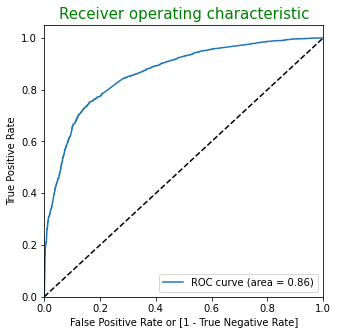

In [81]:
# plot ROC curve
draw_roc(y_train_pred_df.Converted_actual, y_train_pred_df.Converted_prob)

## <font color=red> Optimal Threshold Value

In [82]:
# list containing all threshold values
num = np.arange(0.0,1.005,0.005, dtype='float')
num2=[]
for i in num:
    num2.append(round(i,3))
    
# creating df containing predicted conversion for various threshold values 
for i in num2:
    y_train_pred_df[i] = y_train_pred_df.Converted_prob.apply(lambda x: 1 if x>i else 0)
    
y_train_pred_df.head()

,LeadID,Converted_actual,Converted_prob,Converted_pred,0.0,0.005,0.01,0.015,0.02,0.025,0.03,0.035,0.04,0.045,0.05,0.055,0.06,0.065,0.07,0.075,0.08,0.085,0.09,0.095,0.1,0.105,0.11,0.115,0.12,0.125,0.13,0.135,0.14,0.145,0.15,0.155,0.16,0.165,0.17,0.175,0.18,0.185,0.19,0.195,0.2,0.205,0.21,0.215,0.22,0.225,0.23,0.235,0.24,0.245,0.25,0.255,0.26,0.265,0.27,0.275,0.28,0.285,0.29,0.295,0.3,0.305,0.31,0.315,0.32,0.325,0.33,0.335,0.34,0.345,0.35,0.355,0.36,0.365,0.37,0.375,0.38,0.385,0.39,0.395,0.4,0.405,0.41,0.415,0.42,0.425,0.43,0.435,0.44,0.445,0.45,0.455,0.46,0.465,0.47,0.475,0.48,0.485,0.49,0.495,0.5,0.505,0.51,0.515,0.52,0.525,0.53,0.535,0.54,0.545,0.55,0.555,0.56,0.565,0.57,0.575,0.58,0.585,0.59,0.595,0.6,0.605,0.61,0.615,0.62,0.625,0.63,0.635,0.64,0.645,0.65,0.655,0.66,0.665,0.67,0.675,0.68,0.685,0.69,0.695,0.7,0.705,0.71,0.715,0.72,0.725,0.73,0.735,0.74,0.745,0.75,0.755,0.76,0.765,0.77,0.775,0.78,0.785,0.79,0.795,0.8,0.805,0.81,0.815,0.82,0.825,0.83,0.835,0.84,0.845,0.85,0.855,0.86,0.865,0.87,0.875,0.88,0.885,0.89,0.895,0.9,0.905,0.91,0.915,0.92,0.925,0.93,0.935,0.94,0.945,0.95,0.955,0.96,0.965,0.97,0.975,0.98,0.985,0.99,0.995,1.0
0,1871,0,0.536484,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,6795,0,0.137019,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3516,0,0.330178,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,8105,0,0.670359,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,3934,0,0.285122,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [83]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

for i in num2:
    cm1 = confusion_matrix(y_train_pred_df.Converted_actual, y_train_pred_df[i])
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df.head()

,prob,accuracy,sensi,speci
0.000,0.000,0.381262,1.0,0.000000
0.005,0.005,0.381262,1.0,0.000000
0.010,0.010,0.381880,1.0,0.001000
0.015,0.015,0.382962,1.0,0.002749
0.020,0.020,0.390538,1.0,0.014993


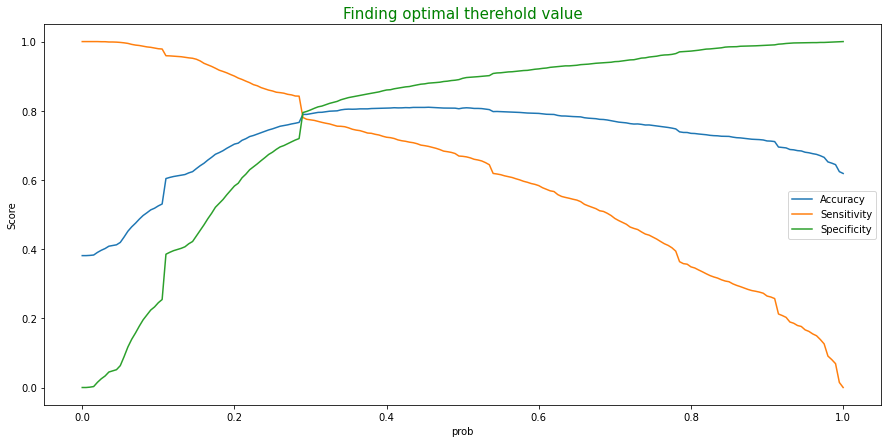

In [84]:
# plot accuracy, sensitivity and specificity to find optimal threshold value
plt.figure(figsize=(15,7))
sns.lineplot(data=cutoff_df, x='prob', y='accuracy', label='Accuracy')
sns.lineplot(data=cutoff_df, x='prob', y='sensi', label='Sensitivity')
sns.lineplot(data=cutoff_df, x='prob', y='speci', label='Specificity')
plt.ylabel('Score')
plt.legend()
plt.title('Finding optimal therehold value',fontdict={'fontsize':15, 'fontweight':5, 'color':'g'})
plt.show()

**From the curve, 0.29 is taken as cutoff**

In [85]:
# adding column final predicted based on cutoff 0.29
y_train_pred_df['final_predicted'] = y_train_pred_df.Converted_prob.apply(lambda x: 1 if x>0.29 else 0)
y_train_pred_df.head()

,LeadID,Converted_actual,Converted_prob,Converted_pred,0.0,0.005,0.01,0.015,0.02,0.025,0.03,0.035,0.04,0.045,0.05,0.055,0.06,0.065,0.07,0.075,0.08,0.085,0.09,0.095,0.1,0.105,0.11,0.115,0.12,0.125,0.13,0.135,0.14,0.145,0.15,0.155,0.16,0.165,0.17,0.175,0.18,0.185,0.19,0.195,0.2,0.205,0.21,0.215,0.22,0.225,0.23,0.235,0.24,0.245,0.25,0.255,0.26,0.265,0.27,0.275,0.28,0.285,0.29,0.295,0.3,0.305,0.31,0.315,0.32,0.325,0.33,0.335,0.34,0.345,0.35,0.355,0.36,0.365,0.37,0.375,0.38,0.385,0.39,0.395,0.4,0.405,0.41,0.415,0.42,0.425,0.43,0.435,0.44,0.445,0.45,0.455,0.46,0.465,0.47,0.475,0.48,0.485,0.49,0.495,0.5,0.505,0.51,0.515,0.52,0.525,0.53,0.535,0.54,0.545,0.55,0.555,0.56,0.565,0.57,0.575,0.58,0.585,0.59,0.595,0.6,0.605,0.61,0.615,0.62,0.625,0.63,0.635,0.64,0.645,0.65,0.655,0.66,0.665,0.67,0.675,0.68,0.685,0.69,0.695,0.7,0.705,0.71,0.715,0.72,0.725,0.73,0.735,0.74,0.745,0.75,0.755,0.76,0.765,0.77,0.775,0.78,0.785,0.79,0.795,0.8,0.805,0.81,0.815,0.82,0.825,0.83,0.835,0.84,0.845,0.85,0.855,0.86,0.865,0.87,0.875,0.88,0.885,0.89,0.895,0.9,0.905,0.91,0.915,0.92,0.925,0.93,0.935,0.94,0.945,0.95,0.955,0.96,0.965,0.97,0.975,0.98,0.985,0.99,0.995,1.0,final_predicted
0,1871,0,0.536484,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,6795,0,0.137019,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3516,0,0.330178,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,8105,0,0.670359,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,3934,0,0.285122,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [86]:
# evaluation metrics
model_eval_func(y_train_pred_df.Converted_actual, y_train_pred_df.final_predicted)

Accuracy: 0.789
Sensitivity/Recall: 0.781
Specificity: 0.795
Positive predicted values/Precision: 0.701
Negative Predicted Values: 0.855
F-score: 0.739


,Not Converted,Converted
Actual/Predicted,,
Not Converted,3181,821
Converted,541,1925


### <font color=blue> Precision vs Recall Tradeoff

In [87]:
# import library
from sklearn.metrics import precision_recall_curve

p, r, thresholds = precision_recall_curve(y_train_pred_df.Converted_actual, y_train_pred_df.Converted_prob)

In [88]:
# creating a df containing precision and recall for various threshold values
tradeoff_df = pd.DataFrame(zip(thresholds,p,r), columns=['Thresholds','Precision','Recall'])
tradeoff_df.head()

,Thresholds,Precision,Recall
0,0.024705,0.387310,1.000000
1,0.025153,0.387213,0.999594
2,0.025351,0.387274,0.999594
3,0.025436,0.387335,0.999594
4,0.025535,0.387396,0.999594


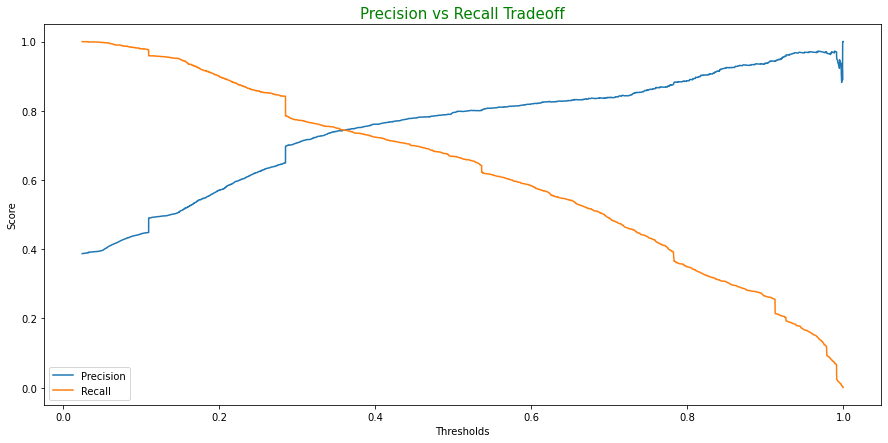

In [89]:
# precision vs recall tradeoff plot
plt.figure(figsize=(15,7))
sns.lineplot(data=tradeoff_df, x='Thresholds', y='Precision', label='Precision')
sns.lineplot(data=tradeoff_df, x='Thresholds', y='Recall', label='Recall')
plt.legend()
plt.ylabel('Score')
plt.title('Precision vs Recall Tradeoff', fontdict={'fontsize':15, 'fontweight':5, 'color':'g'})
plt.show()

**From the above 0.36 taken as threshold**

In [90]:
# calculating final predicted based on cutoff 0.36
y_train_pred_df['final_predicted'] = y_train_pred_df.Converted_prob.apply(lambda x: 1 if x>0.36 else 0)

In [91]:
# evaluation metrics
model_eval_func(y_train_pred_df.Converted_actual, y_train_pred_df.final_predicted)

Accuracy: 0.805
Sensitivity/Recall: 0.744
Specificity: 0.842
Positive predicted values/Precision: 0.744
Negative Predicted Values: 0.842
F-score: 0.744


,Not Converted,Converted
Actual/Predicted,,
Not Converted,3370,632
Converted,631,1835


> **Insights:**
- We can clearly see, taking 0.29  as cutoff value gives better Recall and Accuracy value than at 0.36
- We will go ahead with 0.29 as cutoff

In [92]:
# calculating final predicted based on cutoff 0.29
y_train_pred_df['final_predicted'] = y_train_pred_df.Converted_prob.apply(lambda x: 1 if x>0.29 else 0)

## <font color='red'>Making Predictions on Test Set

In [93]:
# apply scaling on test data
X_test[cont_cols] = scaler.transform(X_test[cont_cols])
X_test[cont_cols].head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
4269,0.857967,0.964504,2.613424
2376,-0.656434,-0.885371,-1.085519
7766,0.290067,-0.777416,1.226321
9199,-0.656434,-0.885371,-1.085519
4359,-0.656434,-0.885371,-1.085519


In [94]:
# removing columns which were removed during RFE and manual selection
X_test = X_test[col]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Welingak Website,Country_unknown,Specialization_Hospitality Management,Specialization_unknown,What is your current occupation_Other,What is your current occupation_Working Professional
4269,0,0.964504,0,0,0,0,0,0,1,1,0
2376,0,-0.885371,0,1,0,0,1,0,1,0,0
7766,0,-0.777416,0,0,0,0,0,0,0,0,1
9199,0,-0.885371,0,0,0,0,1,0,1,0,0
4359,0,-0.885371,0,1,0,0,1,0,0,0,0


In [95]:
# adding constant
X_test_sm = sm.add_constant(X_test)

Making predictions on test data

In [96]:
# making predictions
y_test_pred = res.predict(X_test_sm)
y_test_pred

4269    0.261643
2376    0.782111
7766    0.843803
9199    0.285122
4359    0.912408
          ...   
8649    0.087672
2152    0.782111
7101    0.285122
5331    0.266947
2960    0.782111
Length: 2772, dtype: float64

In [97]:
# creating df
y_test_pred_df = pd.DataFrame({'LeadID':y_test.index,'Converted_actual':y_test.values,'Converted_prob':y_test_pred.values})
y_test_pred_df.head()

,LeadID,Converted_actual,Converted_prob
0,4269,1,0.261643
1,2376,1,0.782111
2,7766,1,0.843803
3,9199,0,0.285122
4,4359,1,0.912408


In [98]:
# add column final_predicted based on cutoff 0.29
y_test_pred_df['final_predicted'] = y_test_pred_df.Converted_prob.apply(lambda x: 1 if x>0.29 else 0)
y_test_pred_df.head()

,LeadID,Converted_actual,Converted_prob,final_predicted
0,4269,1,0.261643,0
1,2376,1,0.782111,1
2,7766,1,0.843803,1
3,9199,0,0.285122,0
4,4359,1,0.912408,1


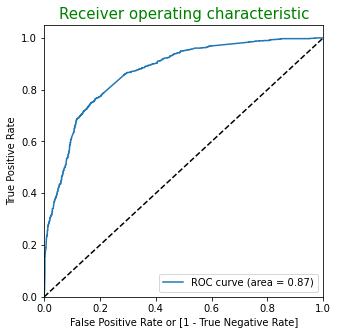

In [99]:
# roc curve plot
draw_roc(y_test_pred_df.Converted_actual, y_test_pred_df.Converted_prob)

In [100]:
# evaluation metrics for test data
print('Evaluation metrics for test data:')
model_eval_func(y_test_pred_df.Converted_actual, y_test_pred_df.final_predicted)

Evaluation metrics for test data:
Accuracy: 0.789
Sensitivity/Recall: 0.784
Specificity: 0.792
Positive predicted values/Precision: 0.711
Negative Predicted Values: 0.849
F-score: 0.745


,Not Converted,Converted
Actual/Predicted,,
Not Converted,1328,349
Converted,237,858


## <font color=red> Final Result

In [101]:
# evaluation metrics for train data
print('Evaluation metrics for train data:')
model_eval_func(y_train_pred_df.Converted_actual, y_train_pred_df.final_predicted)

Evaluation metrics for train data:
Accuracy: 0.789
Sensitivity/Recall: 0.781
Specificity: 0.795
Positive predicted values/Precision: 0.701
Negative Predicted Values: 0.855
F-score: 0.739


,Not Converted,Converted
Actual/Predicted,,
Not Converted,3181,821
Converted,541,1925


In [102]:
# evaluation metrics for test data
print('Evaluation metrics for test data:')
model_eval_func(y_test_pred_df.Converted_actual, y_test_pred_df.final_predicted)

Evaluation metrics for test data:
Accuracy: 0.789
Sensitivity/Recall: 0.784
Specificity: 0.792
Positive predicted values/Precision: 0.711
Negative Predicted Values: 0.849
F-score: 0.745


,Not Converted,Converted
Actual/Predicted,,
Not Converted,1328,349
Converted,237,858


### <font color=brown> Table containing the Lead Scores

In [103]:
# table containing the lead score in descending order
y_train_pred_df_modified = y_train_pred_df[['LeadID', 'Converted_actual', 'Converted_prob', 'final_predicted']]
lead_score_df = pd.concat([y_train_pred_df_modified, y_test_pred_df], ignore_index=True)
lead_score_df['Lead Score'] = round(lead_score_df.Converted_prob*100,2)
lead_score_df.sort_values(by='Lead Score', ascending=False, inplace=True)
lead_score_df.head()

,LeadID,Converted_actual,Converted_prob,final_predicted,Lead Score
7014,3478,1,0.999697,1,99.97
4891,8074,1,0.999674,1,99.97
3115,2656,1,0.999717,1,99.97
6312,3428,1,0.999511,1,99.95
8873,5921,1,0.999446,1,99.94
